<a href="https://colab.research.google.com/github/paladinbot/Grafos-T290/blob/main/GrafosHamiltonianos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Teoremas de Grafos Hamiltonianos (Dirac, Ore e Bondy Chvatal):**

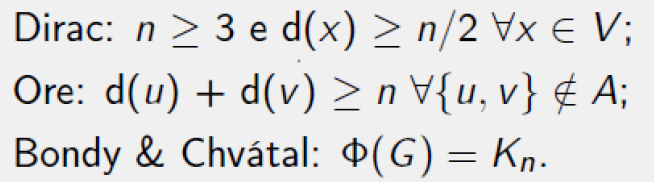

In [4]:
class Graph:
    # Construtor do Python:  
    def __init__(self, neighbors = None):
        if neighbors is None:
            neighbors = []
        self.neighbors = neighbors
    # Vertices:
    def get_vertices(self):
        return list(self.neighbors.keys())
    # Arestas:
    def get_neighbors(self):
        neighbors_name = []
        for vertice in self.neighbors:
            for i in self.neighbors[vertice]:
                if {i, vertice} not in neighbors_name:
                    neighbors_name.append({vertice, i})
        return neighbors_name
    # Teste do teorema de Dirac:
    def dirac(self):
        for i in self.get_vertices():
            if (not len(self.get_vertices()) >= 3 or len(self.neighbors[i]) < (len(self.get_vertices()))/2):
                return 0
        return 1
    # Teste do teorema de Ore:
    def ore(self):
        count_not_adj = 0
        count_ore = 0
        for i in self.get_vertices():
            for j in self.get_vertices():
                if (i != j and not self.neighbors[i].__contains__(j)):
                    count_not_adj = count_not_adj + 1
                    if(len(self.neighbors[i]) + len(self.neighbors[j]) >= len(self.get_vertices())):
                        count_ore = count_ore + 1
        if (count_ore == count_not_adj):
            return 1
        else:
            return 0
    # Teste do teorema de Bondy Chvatal:   
    def bondy_chvatal(self):
      fecho_g = {}
      for i in self.get_vertices():
        fecho_g[i] = []
        for k in self.neighbors[i]:
          fecho_g[i].append(k)
      # Teste de Adjacência 
      def is_done_not_adj(fecho_g):
        for i in list(fecho_g.keys()):
          for j in list(fecho_g.keys()):
            if(i != j):
              if((not fecho_g[i].__contains__(j)) and len(fecho_g[i]) + len(fecho_g[j]) >= len(list(fecho_g.keys()))):
                return 1
        return 0
      while(is_done_not_adj(fecho_g)):  #Iteração do fecho do grafo 
        for i in self.get_vertices():
          for j in self.get_vertices():
            if(i != j and not fecho_g[i].__contains__(j) and len(fecho_g[i]) + len(fecho_g[j]) >= len(list(fecho_g.keys()))): # Teste da condicional
              fecho_g[i].append(j)
              fecho_g[j].append(i)
      index = 0;
      for i in list(fecho_g.keys()):   #Verificação se o Grafo é completo
        if len(fecho_g[i]) == len(list(fecho_g.keys())) -1:
          index = index + 1
      if index == len(list(fecho_g.keys())):  
        return 1
      else: 
        return 0

In [2]:
#Alocação de Dados:

estados = {
    "B": ["A", "D", "C"],
    "C": ["B", "A", "D"],
    "D": ["A", "B", "C"],
    "A": ["B", "C", "D"]
}

ore_exemplo = {
    "B": ["A", "D"],
    "C": ["E", "A", "D"],
    "D": ["E", "B", "C"],
    "A": ["B", "C", "E"],
    "E": ["A", "C", "D"]
}

bc_exemplo = {
    "B": ["A", "D", "C"],
    "C": ["E", "A", "B"],
    "D": ["E", "B", "F"],
    "A": ["B", "C"],
    "E": ["F", "C", "D"],
    "F": ["D", "E"]
}

caso_teste1 = {
    "A": ["B", "G", "E", "F"],
    "B": ["A", "C", "D", "G"],
    "C": ["B", "D", "G", "E"],
    "D": ["C", "E", "B", "F"],
    "E": ["D", "F", "C", "A"],
    "F": ["E", "G", "A", "D"],
    "G": ["A", "F", "B", "C"]
}

caso_teste2 = {
    "A": ["B", "G", "E", "F"],
    "B": ["A", "C", "D", "G"],
    "C": ["B", "D", "G", "E"],
    "D": ["C", "E", "B"],
    "E": ["D", "F", "C", "A"],
    "F": ["E", "G", "A"],
    "G": ["A", "F", "B", "C"]
}

caso_teste3 = {
    "A": ["B", "G", "F"],
    "B": ["A", "C", "D", "G"],
    "C": ["B", "D"],
    "D": ["C", "E", "B"],
    "E": ["D", "F"],
    "F": ["E", "G", "A"],
    "G": ["A", "F", "B"]
}

caso_teste4 = {
    "A": ["B", "G"],
    "B": ["A", "C", "D", "G"],
    "C": ["B", "D"],
    "D": ["C", "E", "B"],
    "E": ["D", "F"],
    "F": ["E", "G"],
    "G": ["A", "F", "B"]
}

In [5]:
#Testes e Visualização

h1 = Graph(caso_teste1)
h2 = Graph(caso_teste2)
h3 = Graph(caso_teste3)
h4 = Graph(caso_teste4)
h5 = Graph(estados)

print("------------------------------------------")
print("Modelos com o teorema de Dirac:")
print("O modelo 1","" if h1.dirac() else "não", "cumpre Dirac")
print("O modelo 2","" if h2.dirac() else "não", "cumpre Dirac")
print("O modelo 3","" if h3.dirac() else "não", "cumpre Dirac")
print("O modelo 4","" if h4.dirac() else "não", "cumpre Dirac")
print("------------------------------------------")

print("------------------------------------------")
print("Modelos com o teorema de Ore:")
print("O modelo 1","" if h1.ore() else "não", "cumpre ore")
print("O modelo 2","" if h2.ore() else "não", "cumpre ore")
print("O modelo 3","" if h3.ore() else "não", "cumpre ore")
print("O modelo 4","" if h4.ore() else "não", "cumpre ore")
print("------------------------------------------")

print("------------------------------------------")
print("Modelos com o teorema de Ore:")
print("O modelo 1","" if h1.bondy_chvatal() else "não", "cumpre bondy_chvatal")
print("O modelo 2","" if h2.bondy_chvatal() else "não", "cumpre bondy_chvatal")
print("O modelo 3","" if h3.bondy_chvatal() else "não", "cumpre bondy_chvatal")
print("O modelo 4","" if h4.bondy_chvatal() else "não", "cumpre bondy_chvatal")
print("------------------------------------------")


------------------------------------------
Modelos com o teorema de Dirac:
O modelo 1  cumpre Dirac
O modelo 2 não cumpre Dirac
O modelo 3 não cumpre Dirac
O modelo 4 não cumpre Dirac
------------------------------------------
------------------------------------------
Modelos com o teorema de Ore:
O modelo 1  cumpre ore
O modelo 2 não cumpre ore
O modelo 3 não cumpre ore
O modelo 4 não cumpre ore
------------------------------------------
------------------------------------------
Modelos com o teorema de Ore:
O modelo 1  cumpre bondy_chvatal
O modelo 2  cumpre bondy_chvatal
O modelo 3  cumpre bondy_chvatal
O modelo 4 não cumpre bondy_chvatal
------------------------------------------
